# Minimal Working Example for LongHCPulse

This notebook is a minimal working example for LongHCPulse which computes the heat capacity of $\rm{Yb_2Ti_2O_7}$.

This can serve as a template for processing other data sets.

# A: Import and process heat capacity data

In [1]:
# Minimal Working Example for LongHCPulse
# Allen Scheie

# import libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from LongHCPulse import LongHCPulse # class to compute heat capacity

In [2]:
# Find Yb2Ti2O7 molar mass
mmYb = 173.201 	# g/mol   (from WolframAlpha.com)
mmTi = 47.867	# g/mol
mmO = 15.9994	# g/mol
MMYbTiO = (2*mmYb + 2*mmTi + 7*mmO)

# Import data
datafile = 'Yb2Ti2O7_longpulse.raw'
DRcalfile = 'DRPuck27.cal'
YbTiO = LongHCPulse(datafile=datafile,calfile=DRcalfile,
	sampmass=1.04,molarmass=MMYbTiO, scaleshortpulse=1e-6/1.04e-3*MMYbTiO)   ## sample mass is in mg

**************** LongHCPulse v 1.2 ******************
 please cite   https://arxiv.org/pdf/1705.07129.pdf
******************************************************
 - Importing data...
 100%


<IPython.core.display.Javascript object>


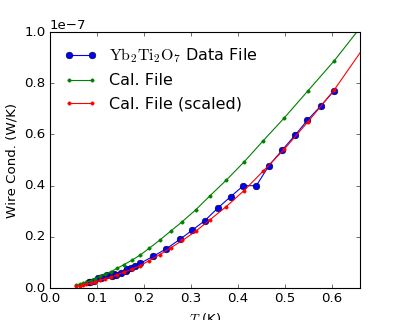

In [3]:
# Scale wire conductivity

f, ax = plt.subplots(1,1, figsize=(5,4))
plt.plot(YbTiO.avgThermCondWire[0],YbTiO.avgThermCondWire[1],
         marker = 'o', label='$\\rm Yb_2Ti_2O_7$ Data File')
plt.plot(YbTiO.Kw[0],YbTiO.Kw[1], marker = '.', label='Cal. File')  
plt.plot(YbTiO.Kw[0],YbTiO.Kw[1]*0.65 + 2.5e6*YbTiO.Kw[1]**2,   ## <--- Play with these values until the 
                                                                ##      curves agree
         marker = '.',  label='Cal. File (scaled)') 
plt.xlim(0,0.66)
plt.ylim(0,10e-8)
plt.xlabel('$T$ (K)')
plt.ylabel('Wire Cond. (W/K)')
plt.legend(loc=2, frameon=False)

In [4]:
# Re-scale wire thermal conductivity (see cell above)
YbTiO.Kw[1] = YbTiO.Kw[1]*0.65 + 2.5e6*YbTiO.Kw[1]**2

# Compute Heat Capacity
YbTiO.heatcapacity(smoothlevel=0)
# Scale data to per Yb ion instead of per F.U.:
YbTiO.scale(2)

 - Computing Heat Capacity...
 100%


# B: Saving Processed Data
This is very useful if the data takes a while to process: process and save it in one script, and import and plot it in another script. The saved data must be a .pickle file.

In [5]:
## Save the object with processed data to a file (uncomment the following line)
#YbTiO.saveData('Yb2Ti2O7_processedData.pickle')

## Import data again   (uncomment the following line)
#YbTiO = LongHCPulse('Yb2Ti2O7_processedData.pickle')

Alternatively, if you want to process and plot the data with an external program, the computed heat capacity traces can be saved to a comma-separated text file with the following command:

In [6]:
YbTiO.savetraces('YTO_processedData.txt', Barray=[0.0])  #Barray can be set to all, or a select number of fields.

# C: Plot Commands

## LinePlot
Plots each heat capacity trace (cooling curves only) individually

<IPython.core.display.Javascript object>


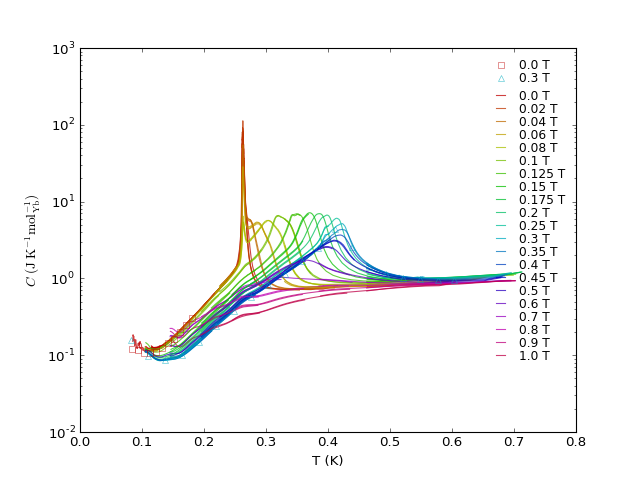

/home/allen/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1121: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


In [7]:
YbTiO.labels=[]
YbTiO.shortpulselabels=[]
f,ax = plt.subplots(1,1)

YbTiO.lineplot(ax,'All', demag=False)  
# If you want to plot a particular set of magnetic fields, change 'All' to a list of fields
# If you want to plot heating pulses as well, add the command "plotHeatPulses=True"

# Label Axes
ax.set_ylabel("$C$ $(\\rm{J\> K^{-1} mol^{-1}_{Yb}})$")
ax.set_xlabel("T (K)")
ax.set_yscale('log')

# Show legend
short_legend=ax.legend(handles=YbTiO.shortpulselabels,labelspacing = 0,handlelength=1.4,
	fontsize=11,frameon=False, bbox_to_anchor=(0.97, 1.0),numpoints=1)
long_legend=ax.legend(handles=YbTiO.labels,labelspacing = 0,handlelength=1.4,fontsize=11,
	frameon=False, bbox_to_anchor=(1.0, 0.92))
ax.add_artist(short_legend)

### END OF MINIMAL WORKING EXAMPLE
If all you want are some line plots, you can stop here.
However, LongHCPulse has many other plotting utilities which you can take advantage of. The rest of this notebook explains how to use them.





## LinePlotCombine
Combines all heat capacity traces taken at each magnetic field. The user has the option of applying a smoothing factor to the data to reduce the noise from combining traces.

<IPython.core.display.Javascript object>


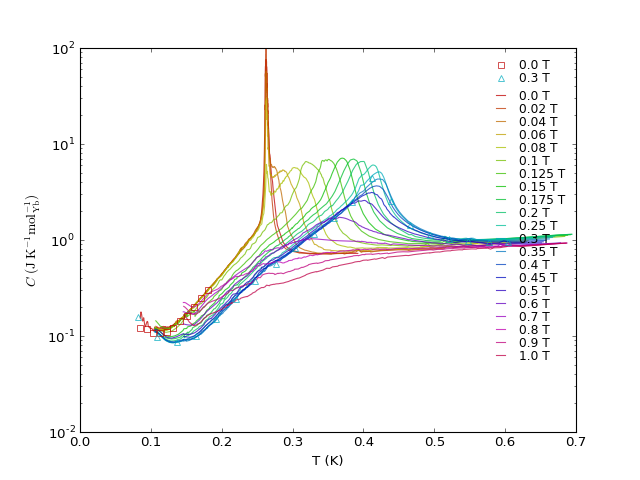

 combining traces...


In [8]:
YbTiO.labels=[]
YbTiO.shortpulselabels=[]
f,ax = plt.subplots(1,1)

YbTiO.lineplotCombine(ax,'All',smooth=0, demag=False)
# If you want to plot a particular set of magnetic fields, change 'All' to a list of fields

# Label Axes
ax.set_ylabel("$C$ $(\\rm{J\> K^{-1} mol^{-1}_{Yb}})$")
ax.set_xlabel("T (K)")
ax.set_yscale('log')
# show legend
short_legend=ax.legend(handles=YbTiO.shortpulselabels,labelspacing = 0,handlelength=1.4,
	fontsize=11,frameon=False, bbox_to_anchor=(0.97, 1.0),numpoints=1)
long_legend=ax.legend(handles=YbTiO.labels,labelspacing = 0,handlelength=1.4,fontsize=11,
	frameon=False, bbox_to_anchor=(1.0, 0.92))
ax.add_artist(short_legend)

## MeshGrid
Make a 2D plot of heat capacity vs. temperature and field

<IPython.core.display.Javascript object>


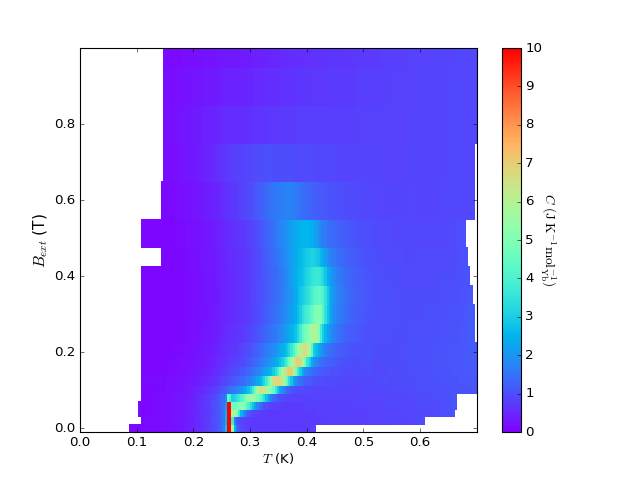

/home/allen/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/home/allen/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [9]:
f, ax = plt.subplots(1,1)

# Create 2D grid
xarray = np.arange(0.0,0.9,0.004)
intens, Bedg = YbTiO.meshgrid(Tarray =xarray,Barray='All')
# Plot 2D grid of heat capacity
meshdata = ax.pcolormesh(xarray,Bedg/10000,intens,rasterized = True, 
                        cmap = 'rainbow', vmin=0.0, vmax=10)

# Label Axes
ax.set_ylabel('$B_{ext}$ (T)',fontsize=14,labelpad = 4)
ax.set_ylim(-100./10000,1)
ax.set_xlabel("$T$ (K)", labelpad = 1) 
ax.set_xlim(0,0.7)
# Colorscale bar
cb=plt.colorbar(meshdata)
cb.set_label('$C$ $(\\rm{J\> K^{-1} mol^{-1}_{Yb}})$', rotation = -90, labelpad = 14)

## plotEntropy

This function integrates heat capacity to get entropy with $\int \frac{C}{T} dT = \Delta S$.

It does this by first combining the traces (using the same method as lineplotcombine, which the "smooth" parameter is for) and then integrating over each trace, extrapolating linearly from the lowest temperature data point to $T=0$, $C=0$.

<IPython.core.display.Javascript object>


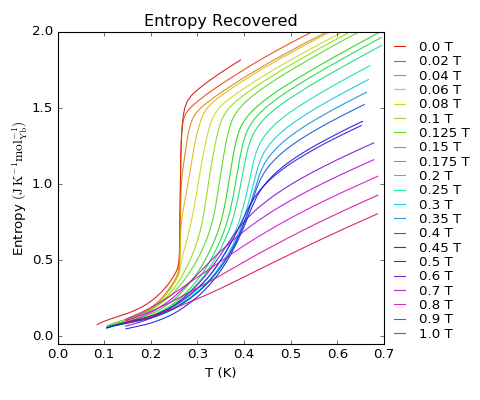

 computing entropy...


In [10]:
#***************
# Plot the entropy
#***************
f, ax = plt.subplots(1,1,figsize=(6,5))
YbTiO.plotEntropy(ax,'All',smooth=3)

# Label axes
ax.set_xlabel('T (K)')
ax.set_ylabel('Entropy $(\\rm{J\> K^{-1} mol^{-1}_{Yb}})$', labelpad = 3)
ax.set_ylim(-0.05,2)
ax.set_title('Entropy Recovered')
# Plot legend
f.subplots_adjust(left = 0.12,right = 0.80, bottom = 0.14, top = 0.92)
ax.legend(handles=YbTiO.entropylabels,labelspacing = 0.1,handlelength=1.4,fontsize=12,
	frameon=False, bbox_to_anchor=(1.3, 1.01))

## Appendix: Plotting Data "by hand"
Sometimes it is useful to plot the heat capacity data without the above commands. In that case, one can use the following pieces of code:

### 1. Plotting data from a single heating or cooling pulse
This is useful if you wand to examine the results of a particular heating or cooling pulse to see if a feature is an artifact or is real.

<IPython.core.display.Javascript object>


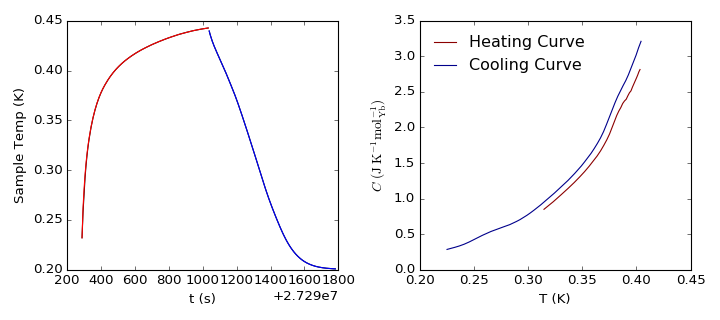

In [11]:
# Plot a single heating and cooling curve
curve = 48   #try changing to curve number to see other results.

f, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].plot(YbTiO.smoothedData[curve][0], YbTiO.smoothedData[curve][1],'k') # smoothed data
ax[0].plot(YbTiO.rawdata[curve][0,:,0], YbTiO.rawdata[curve][1,:,0],'r')   # heating pulse
ax[0].plot(YbTiO.rawdata[curve][0,:,1], YbTiO.rawdata[curve][1,:,1],'b')   # cooling pulse
ax[0].set_xlabel('t (s)')
ax[0].set_ylabel('Sample Temp (K)')

YbTiO.plotHC(ax[1],index=curve,heatingcolor='darkred',coolingcolor='darkblue')
ax[1].legend(handles=YbTiO.labels, loc=2, numpoints=1, handlelength=1.4, frameon=False)
ax[1].set_xlabel('T (K)')
ax[1].set_ylabel('$C$ $(\\rm{J\> K^{-1} mol^{-1}_{Yb}})$')
plt.tight_layout()

### 2. Plotting C/T for specific fields and with both heating and cooling pulses

If one wants to plot $C$ instead of $C/T$, replace the "plotHCT" command with "plotHC" 

<IPython.core.display.Javascript object>


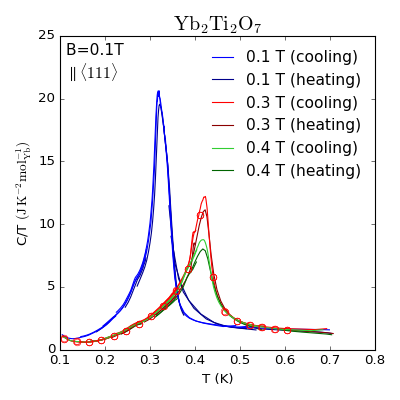

In [12]:
f, ax = plt.subplots(figsize=(5,5))

YbTiO.labels=[]  # If with these commands, one needs set labels=[] first.
for jj in range(len(YbTiO.Bfield)):
	B = round(YbTiO.Bfield[jj],-1)
	if B == 1000:
		YbTiO.plotHCT(plt,index=jj,heatingcolor='darkblue',coolingcolor='blue',
			shortpulsecolor='steelblue',Blabels=True, demag=False)
	if B == 3000:
		YbTiO.plotHCT(plt,index=jj,heatingcolor='darkred',coolingcolor='red',
			shortpulsecolor='red',Blabels=True, demag=False)
	if B == 4000:
		YbTiO.plotHCT(plt,index=jj,heatingcolor='darkgreen',coolingcolor='limegreen',
			shortpulsecolor='green',Blabels=True, demag=False)

plt.xlabel("T (K)")
plt.ylabel("C/T $(\\rm{J\> K^{-2} mol^{-1}_{Yb}})$")
plt.title('$\\rm{Yb_2Ti_2O_7}$', fontsize=18)
plt.text(0.02,0.97,'B=0.1T \n$\parallel \\langle 111 \\rangle$',horizontalalignment='left',
	verticalalignment = 'top',fontsize=14, transform=ax.transAxes)
plt.legend(handles=YbTiO.labels,numpoints=1, fontsize=14, handlelength=1.4, frameon=False)
#plt.ylim(0,37)
plt.xlim(0.1,0.8)
plt.tight_layout()